In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator

In [20]:
df = pd.read_csv("fig2C--propensities.csv")

channel_lenght = df['channel_length'].unique()
assert len(channel_lenght) == 1
channel_lenght = channel_lenght[0]

In [21]:
def MutualInforamtion(p, p0 = 0.5):
    return -p0 * p * np.log2(p0) - (1 - p0 * p) * np.log2(1 - p0 * p) + (1 - p) * p0 * np.log2(1 - p)


df['MI'] = df['l'].apply(lambda l: MutualInforamtion((1 - l) ** channel_lenght))

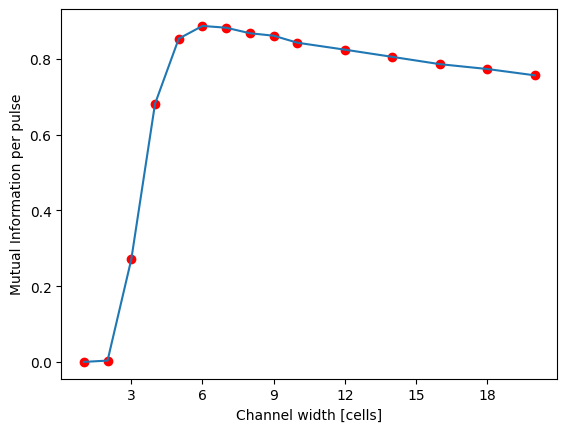

In [22]:
ax = plt.figure().gca()
plt.plot(df['channel_width'], df['MI'])
plt.scatter(df['channel_width'], df['MI'], c='red')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel('Channel width [cells]')
plt.ylabel('Mutual Information per pulse')
plt.savefig('MI.png')